In [1]:
import cv2,os

data_path=r'C:\Users\suren\DSPProject\Train-Test'
categories=os.listdir(data_path)
labels=[i for i in range(len(categories))]

label_dict=dict(zip(categories,labels)) #empty dictionary

print(label_dict)
print(categories)
print(labels)

{'Test': 0, 'Train': 1}
['Test', 'Train']
[0, 1]


In [2]:
data_path=r'C:\Users\suren\Untitled Folder\Train-Test\Train'
classes_path=os.listdir(data_path)
classesf=os.listdir(data_path)
print(classesf)
labels_classes=[i for i in range(len(classesf))]
print(labels_classes)

['1', '2', '3', '4', '5', '6', '7', '8', '9', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34]


In [3]:
data_path=r'C:\Users\suren\DSPProject\Train-Test'

In [4]:
label_classes_dict=dict(zip(classesf,labels_classes))

In [23]:
print(labels_classes)
#print(categories)
print(label_classes_dict)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34]
{'1': 0, '2': 1, '3': 2, '4': 3, '5': 4, '6': 5, '7': 6, '8': 7, '9': 8, 'a': 9, 'b': 10, 'c': 11, 'd': 12, 'e': 13, 'f': 14, 'g': 15, 'h': 16, 'i': 17, 'j': 18, 'k': 19, 'l': 20, 'm': 21, 'n': 22, 'o': 23, 'p': 24, 'q': 25, 'r': 26, 's': 27, 't': 28, 'u': 29, 'v': 30, 'w': 31, 'x': 32, 'y': 33, 'z': 34}


In [6]:
import numpy as np

In [7]:
img_size=128
data=[]
target=[]
c=0
minValue = 70
for category in categories:
    
    cat_path=os.path.join(data_path,category)
    print(cat_path)
    cat_names=os.listdir(cat_path)
    print(cat_names)
    for classes in cat_names:
        folder_path=os.path.join(data_path,category,classes)
        print(folder_path)
        img_names=os.listdir(folder_path)
        #print(img_names)
        for img_name in img_names:
            #print(img_name)
            img_path=os.path.join(folder_path,img_name)
            img=cv2.imread(img_path)
            
            try:
                gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY) 
                blur = cv2.GaussianBlur(gray,(5,5),2)
                th3 = cv2.adaptiveThreshold(blur,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY_INV,11,2)
                ret, res = cv2.threshold(th3, minValue, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                #res=np.array(res)
                #print(type(res))
            #Converting the image into gray scale
                resized=cv2.resize(res,(img_size,img_size))
            #resizing the gray scale into 50x50, since we need a fixed common size for all the images in the dataset
                data.append(resized)
                #print(data)
                target.append(label_classes_dict[classes])
            except Exception as e:
                print('Exception:',e)
            
            
        
        

C:\Users\suren\DSPProject\Train-Test\Test
['1', '2', '3', '4', '5', '6', '7', '8', '9', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']
C:\Users\suren\DSPProject\Train-Test\Test\1
C:\Users\suren\DSPProject\Train-Test\Test\2
C:\Users\suren\DSPProject\Train-Test\Test\3
C:\Users\suren\DSPProject\Train-Test\Test\4
C:\Users\suren\DSPProject\Train-Test\Test\5
C:\Users\suren\DSPProject\Train-Test\Test\6
C:\Users\suren\DSPProject\Train-Test\Test\7
C:\Users\suren\DSPProject\Train-Test\Test\8
C:\Users\suren\DSPProject\Train-Test\Test\9
C:\Users\suren\DSPProject\Train-Test\Test\a
C:\Users\suren\DSPProject\Train-Test\Test\b
C:\Users\suren\DSPProject\Train-Test\Test\c
C:\Users\suren\DSPProject\Train-Test\Test\d
C:\Users\suren\DSPProject\Train-Test\Test\e
C:\Users\suren\DSPProject\Train-Test\Test\f
C:\Users\suren\DSPProject\Train-Test\Test\g
C:\Users\suren\DSPProject\Train-Test\Test\h
C:\Users\suren\DSPProject\Train-Te

In [8]:
datanp=np.array(data)

In [9]:
datanp.shape

(35280, 128, 128)

In [10]:
targetnp=np.array(target)

targetnp.shape

(35280,)

In [87]:
target

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [88]:
import numpy as np

data=np.array(data)/255.0
data=np.reshape(data,(data.shape[0],img_size,img_size,1))
target=np.array(target)
print(target.shape)

from keras.utils import np_utils

new_target=np_utils.to_categorical(target)

(35280, 35)


In [89]:
new_target.shape

(35280, 35, 2)

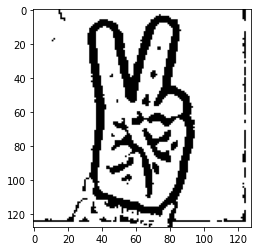

In [13]:
from matplotlib import pyplot as plt

plt.imshow(data[400], cmap='gray')

In [14]:
np.save('data_img',data)
np.save('target',new_target)

In [15]:
data=np.load('data_img.npy')
target=np.load('target.npy')

In [16]:
from sklearn.model_selection import train_test_split
train_data,test_data,train_target,test_target=train_test_split(data,new_target,test_size=0.2)

In [28]:
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense , Dropout
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "1"
sz = 128

classifier = Sequential()
classifier.add(Convolution2D(32, (3, 3), input_shape=(sz, sz, 1), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))
classifier.add(Convolution2D(32, (3, 3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))
classifier.add(Flatten())

classifier.add(Dense(units=128, activation='relu'))
classifier.add(Dropout(0.40))
classifier.add(Dense(units=96, activation='relu'))
classifier.add(Dropout(0.40))
classifier.add(Dense(units=64, activation='relu'))
classifier.add(Dense(units=35, activation='softmax')) # softmax for more than 2

classifier.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy']) # categorical_crossentropy for more than 2

classifier.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 126, 126, 32)      320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 63, 63, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 61, 61, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 30, 30, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 28800)             0         
                                                                 
 dense_4 (Dense)             (None, 128)              

In [29]:
from keras.callbacks import ModelCheckpoint

In [30]:
checkpoint = ModelCheckpoint('model-{epoch:03d}.model',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')
print(train_data.shape)
history=classifier.fit(train_data,train_target,shuffle=True,epochs=20,callbacks=[checkpoint],validation_split=0.3)

(28224, 128, 128, 1)
Epoch 1/20
618/618 [==============================] - 197s 317ms/step - loss: 0.8407 - accuracy: 0.7560 - val_loss: 0.0019 - val_accuracy: 0.9999
Epoch 2/20
618/618 [==============================] - 184s 298ms/step - loss: 0.1617 - accuracy: 0.9490 - val_loss: 1.7306e-04 - val_accuracy: 1.0000
Epoch 3/20
618/618 [==============================] - 186s 301ms/step - loss: 0.1017 - accuracy: 0.9683 - val_loss: 1.8946e-04 - val_accuracy: 1.0000
Epoch 4/20
618/618 [==============================] - 180s 292ms/step - loss: 0.0822 - accuracy: 0.9747 - val_loss: 3.4758e-05 - val_accuracy: 1.0000
Epoch 5/20
618/618 [==============================] - 198s 320ms/step - loss: 0.0671 - accuracy: 0.9798 - val_loss: 3.0328e-05 - val_accuracy: 1.0000
Epoch 6/20
618/618 [==============================] - 187s 302ms/step - loss: 0.0507 - accuracy: 0.9845 - val_loss: 8.5442e-05 - val_accuracy: 1.0000
Epoch 7/20
618/618 [==============================] - 181s 293ms/step - loss: 0.044

In [31]:
print(classifier.evaluate(test_data,test_target))

221/221 [==============================] - 16s 70ms/step - loss: 2.9285e-04 - accuracy: 0.9999
[0.00029285092023201287, 0.9998582601547241]


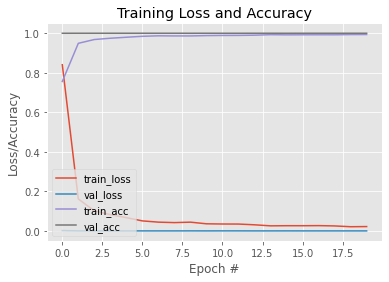

In [32]:
import matplotlib.pyplot as plt
N = 20
H=history
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.savefig('evaluation.png')

In [33]:
# serialize the model to disk
print("[INFO] saving mask detector model...")
classifier.save('isl_classifier.h5')
print("Done !")

[INFO] saving mask detector model...
Done !


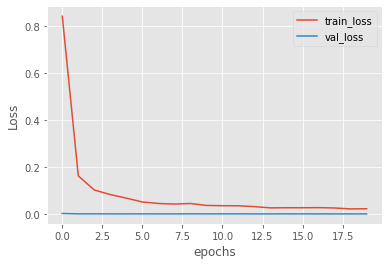

In [34]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.legend(['train_loss','val_loss'], loc=0)
plt.show()

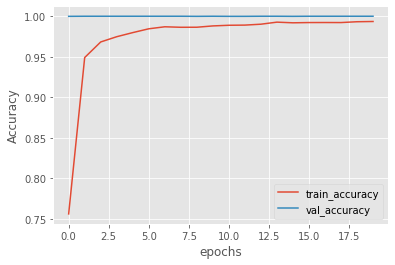

In [35]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.legend(['train_accuracy','val_accuracy'], loc=0)
plt.show()

In [17]:
from sklearn.metrics import confusion_matrix


In [19]:
import keras
classifier = keras.models.load_model("isl_classifier.h5")
y_pred = classifier.predict(test_data)


In [79]:
import tensorflow as tf
con_mat = tf.math.confusion_matrix(labels=tf.argmax(test_target,1), predictions=tf.argmax(y_pred,1)).numpy()
con_mat

array([[181,   0,   0, ...,   0,   0,   0],
       [  2, 191,   0, ...,   0,   0,   0],
       [  1,   0, 234, ...,   0,   0,   0],
       ...,
       [  1,   0,   0, ..., 198,   0,   0],
       [  0,   0,   0, ...,   0, 208,   0],
       [  4,   0,   0, ...,   0,   0, 207]])

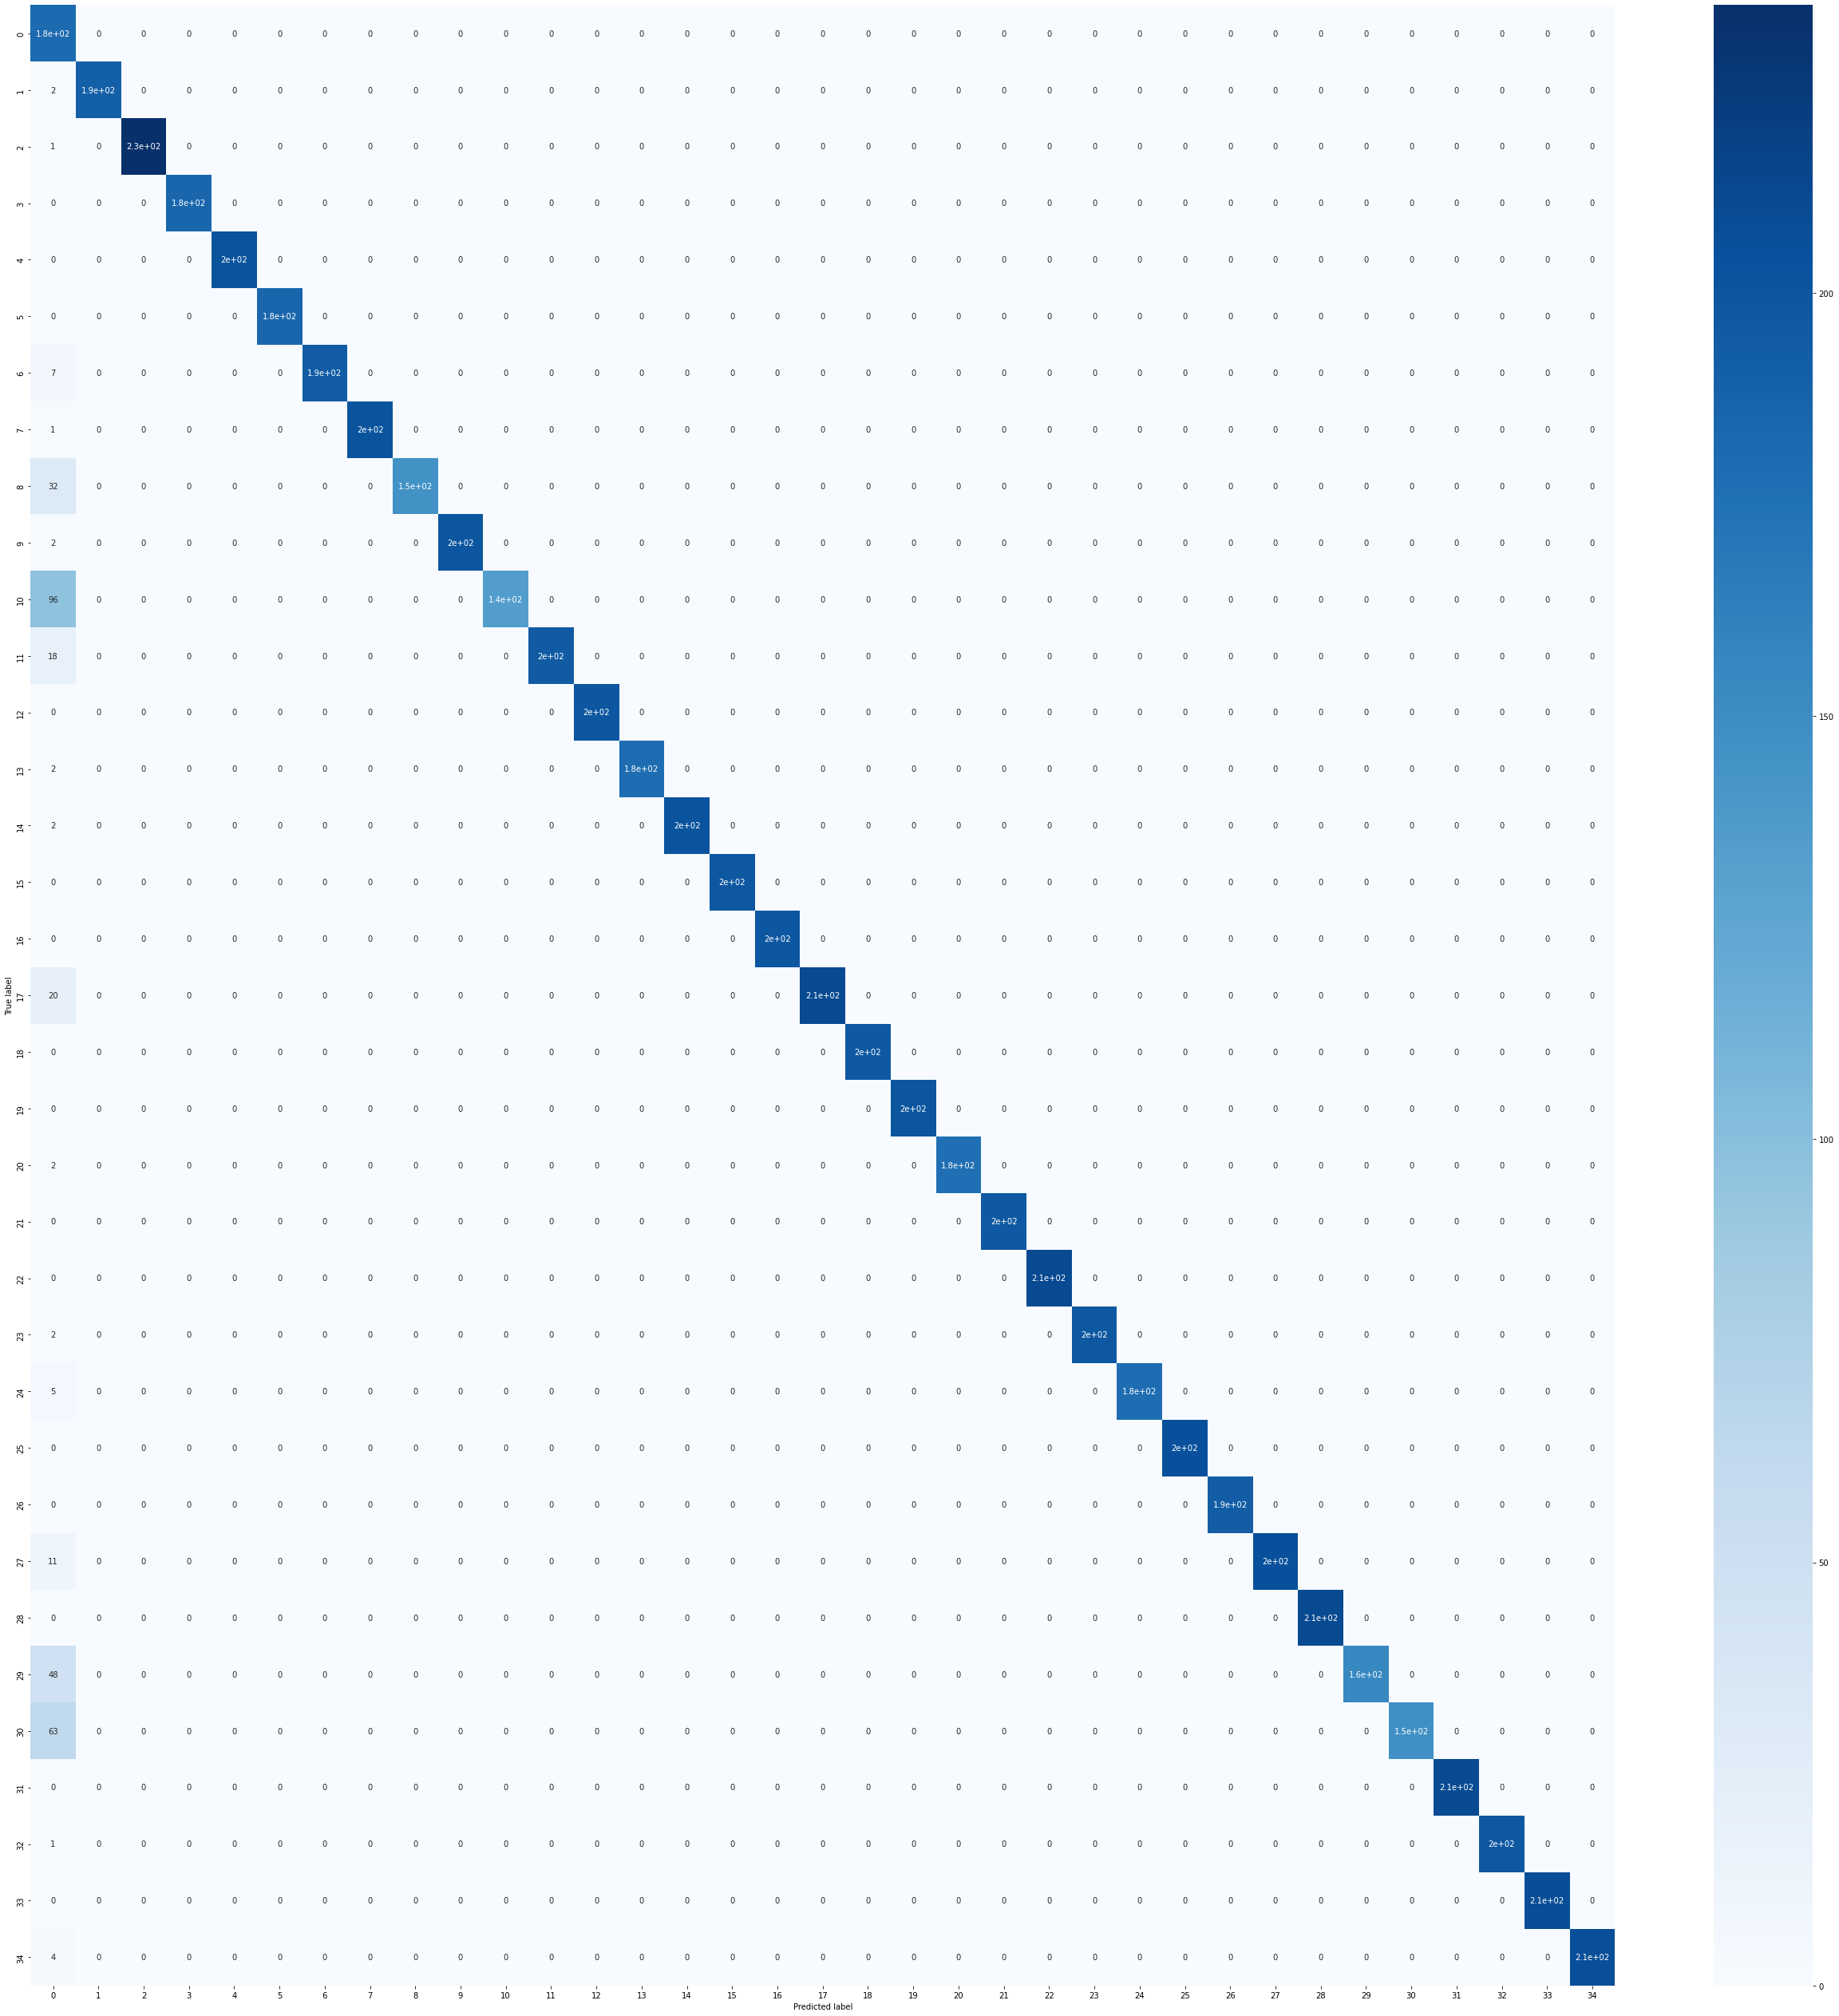

In [86]:
import seaborn as sns
import matplotlib.pyplot as plt

figure = plt.figure(figsize=(35, 35))
sns.heatmap(con_mat, annot=True,cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()
figure.savefig('confusion_matrix.jpg')

<Figure size 432x288 with 0 Axes>